# Load libraries

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency, shapiro, levene, ttest_ind, chi2_contingency, f_oneway
import math
from statsmodels.graphics.gofplots import qqplot


# Load dataset

In [2]:
file_path = (r"C:\Users\aravit01\OneDrive - Kearney\1. RAVI TEJA\datasets\yulu_bike_sharing_dataset.csv")

df = pd.read_csv(file_path)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Basic understanding of data

In [7]:
print(f"rows >> {df.shape[0]} \n")

print(f"columns >> {df.shape[1]} \n")

print(f"any nulls >> {df.isna().sum()} \n")

print(f"any duplicates >> {df.duplicated().sum()} \n")

print(f"unique values >> {df.nunique()} \n")

rows >> 10886 

columns >> 12 

any nulls >> datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64 

any duplicates >> 0 

unique values >> datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64 



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


##  datatype casting

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [10]:
for cols in ['season', 'holiday','workingday','weather']:
    df[cols] = df[cols].astype('category')

## data manipulations

In [14]:
df['year'] = df['datetime'].dt.year

df['month'] = df['datetime'].dt.month

df['day'] = df['datetime'].dt.day

df['hour'] = df['datetime'].dt.hour

In [18]:
df['season'] = df['season'].replace([1,2,3,4], ['spring','summer','fall','winter'])

df['holiday'] = df['holiday'].replace([0,1], ['no','yes'])

df['workingday'] = df['workingday'].replace([0,1], ['no','yes'])

df['month'] = df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['jan','feb','mar','arp','may','jun','jul','aug','sep','oct','nov','dec'])

In [19]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,spring,no,no,1,9.84,14.395,81,0.0,3,13,16,2011,jan,1,0
1,2011-01-01 01:00:00,spring,no,no,1,9.02,13.635,80,0.0,8,32,40,2011,jan,1,1
2,2011-01-01 02:00:00,spring,no,no,1,9.02,13.635,80,0.0,5,27,32,2011,jan,1,2
3,2011-01-01 03:00:00,spring,no,no,1,9.84,14.395,75,0.0,3,10,13,2011,jan,1,3
4,2011-01-01 04:00:00,spring,no,no,1,9.84,14.395,75,0.0,0,1,1,2011,jan,1,4


In [22]:
categorical_cols = df.select_dtypes(include='category').columns

In [24]:
numeric_cols = df.select_dtypes(include='number').columns

In [25]:
categorical_cols, numeric_cols

(Index(['season', 'holiday', 'workingday', 'weather'], dtype='object'),
 Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
        'count', 'year', 'day', 'hour'],
       dtype='object'))

In [27]:
df.select_dtypes(include='number').describe()

,temp,atemp,humidity,windspeed,casual,registered,count,year,day,hour
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,9.992559,11.541613
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,5.476608,6.915838
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,5.000000,6.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,10.000000,12.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,15.000000,18.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,19.000000,23.000000


In [29]:
df.select_dtypes(include='category').describe()

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,winter,no,yes,1
freq,2734,10575,7412,7192


In [32]:
time_span = df['datetime'].max() - df['datetime'].min()
time_span

Timedelta('718 days 23:00:00')

In [43]:
categorical_cols

Index(['season', 'holiday', 'workingday', 'weather'], dtype='object')

## distrubution of numeric cols

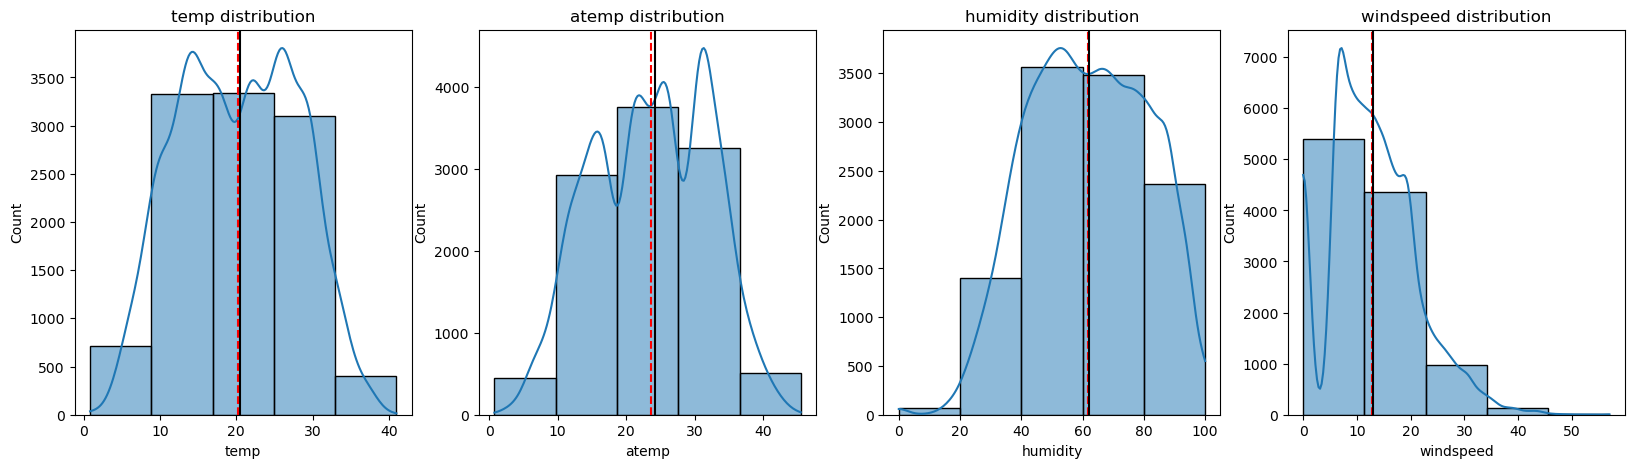

In [164]:
cols = ['temp','atemp','humidity','windspeed']
fig, axes = plt.subplots(1, len(cols), figsize=(20, 5))

for ax, c in zip(axes, cols):
    sns.histplot(data=df, x=c,bins=5,kde=True, ax=ax)
    ax.axvline(df[c].mean(), color = 'red', linestyle='--')
    ax.axvline(df[c].median(), color = 'black', linestyle='-')
    ax.set_title(f'{c} distribution')

plt.show()

## Ratio charts for Categorical cols

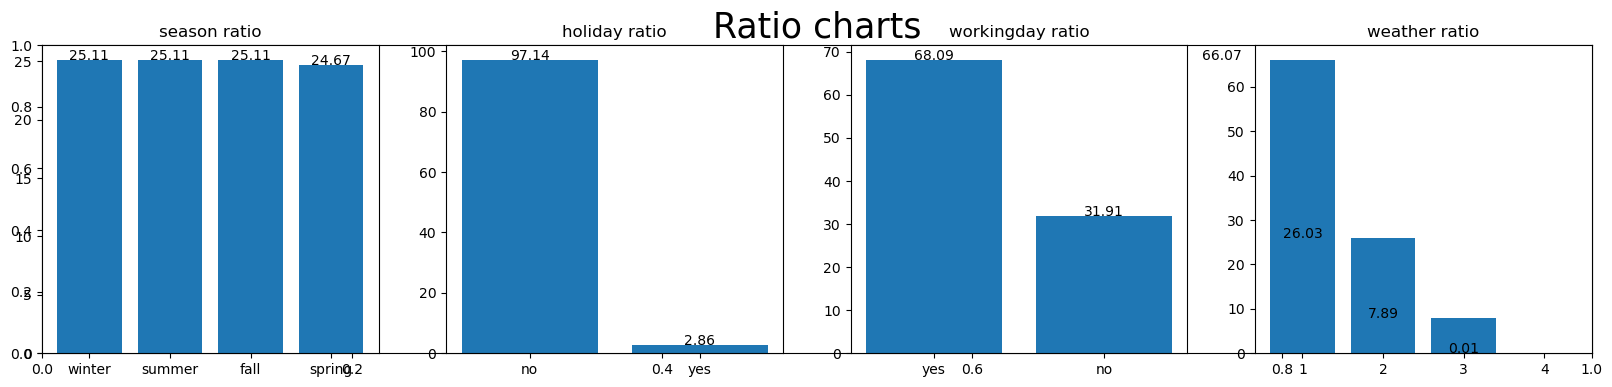

In [278]:
plt.figure(figsize=(20,4))
plt.title("Ratio charts", fontsize = 25, loc = 'center')

plt.subplot(1,4,1)
season_perc= df['season'].value_counts(normalize=True)*100
plt.bar(x=season_perc.index, height=season_perc)
plt.title('season ratio')
for i,v in enumerate(season_perc.values):
    plt.text(i,v,f"{v:.2f}", ha= 'center')

plt.subplot(1,4,2)
holiday_perc= df['holiday'].value_counts(normalize=True)*100
plt.bar(x=holiday_perc.index, height=holiday_perc)
plt.title('holiday ratio')
for i,v in enumerate(holiday_perc.values):
    plt.text(i,v,f"{v:.2f}",  ha= 'center')

plt.subplot(1,4,3)
workingday_perc= df['workingday'].value_counts(normalize=True)*100
plt.bar(x=workingday_perc.index, height=workingday_perc)
plt.title('workingday ratio')
for i,v in enumerate(workingday_perc.values):
    plt.text(i,v,f"{v:.2f}",  ha= 'center')

plt.subplot(1,4,4)
weather_perc= df['weather'].value_counts(normalize=True)*100
plt.bar(x=weather_perc.index, height=weather_perc)
plt.title('weather ratio')
for i,v in enumerate(weather_perc.values):
    plt.text(i,v,f"{v:.2f}",  ha= 'center')

plt.show()

## categorical to Numeric cols (count)

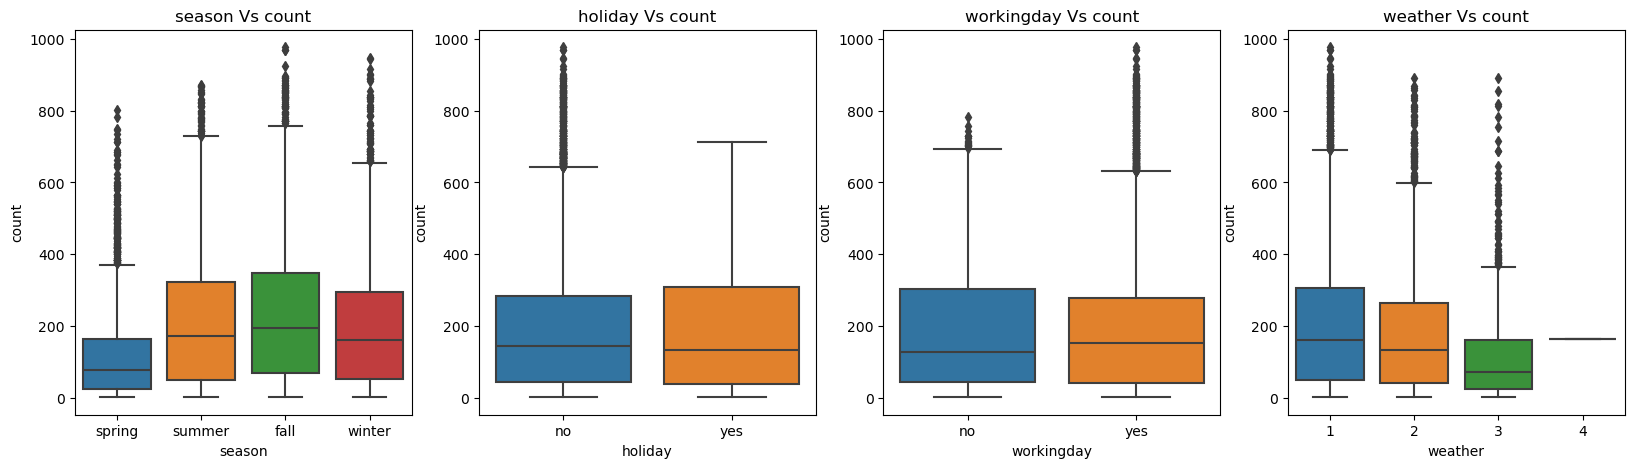

In [133]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
sns.boxplot(data=df, x=df['season'], y=df['count'])
plt.title('season Vs count')

plt.subplot(1,4,2)
sns.boxplot(data=df, x=df['holiday'], y=df['count'])
plt.title('holiday Vs count')

plt.subplot(1,4,3)
sns.boxplot(data=df, x=df['workingday'], y=df['count'])
plt.title('workingday Vs count')

plt.subplot(1,4,4)
sns.boxplot(data=df, x=df['weather'], y=df['count'])
plt.title('weather Vs count')

plt.show()

In [139]:
for cols in categorical_cols:
    value_counts = df[cols].value_counts(normalize=True)*100
    print(value_counts)
    print('='*40)

season
winter    25.114826
summer    25.105640
fall      25.105640
spring    24.673893
Name: proportion, dtype: float64
holiday
no     97.14312
yes     2.85688
Name: proportion, dtype: float64
workingday
yes    68.087452
no     31.912548
Name: proportion, dtype: float64
weather
1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: proportion, dtype: float64


In [282]:
for cols in ['atemp','temp','windspeed','humidity']:
    q1 = df[cols].quantile(0.25)
    q3 = df[cols].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1-(1.5*iqr)
    upper_bound = q3+(1.5*iqr)

In [283]:
lower_bound, upper_bound

(2.0, 122.0)

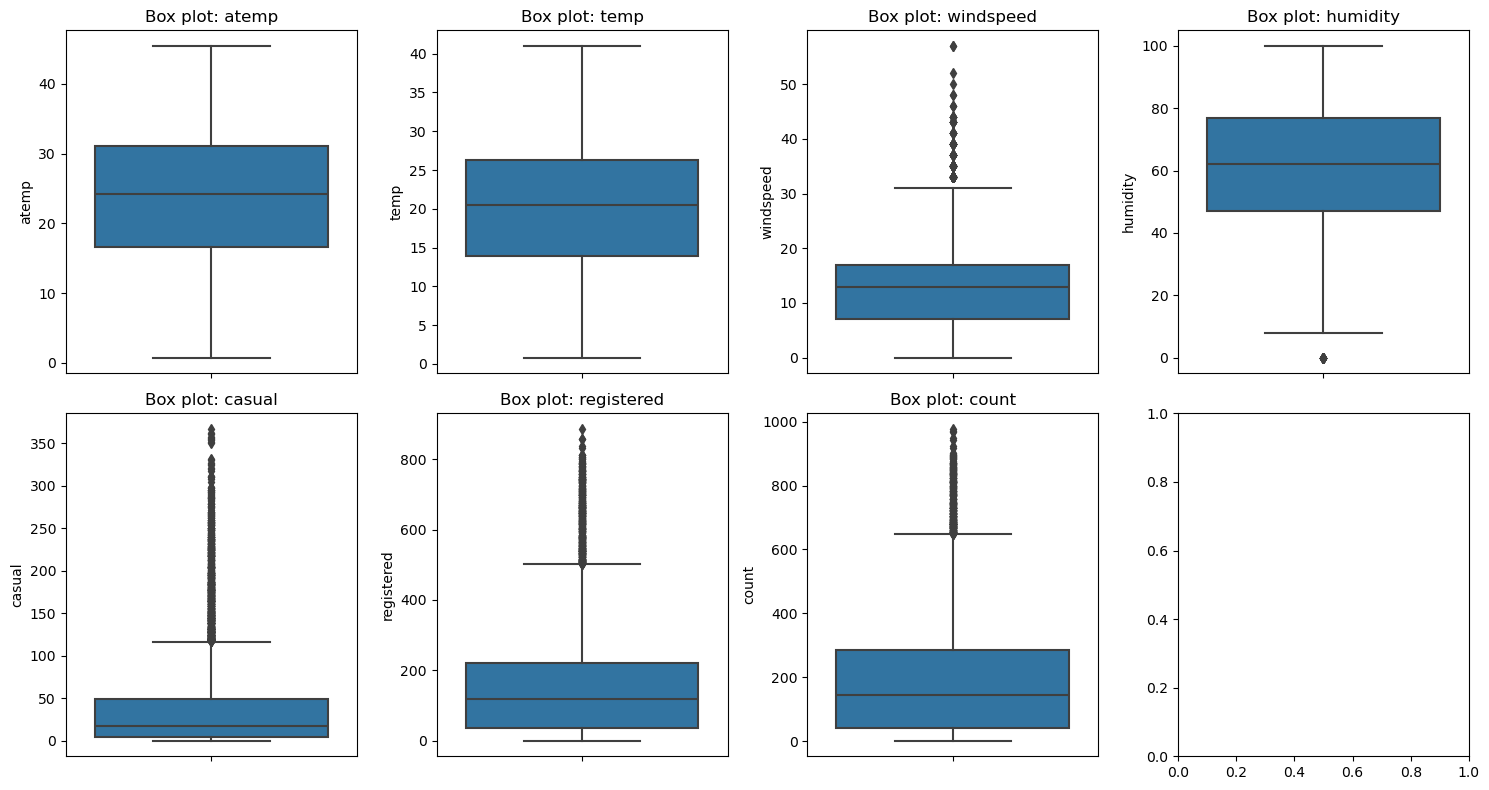

In [211]:
box_columns_1 = ['atemp','temp','windspeed','humidity','casual','registered','count']

# Calculate rows and cols
ncols = math.ceil(len(box_columns_1)/2)
nrows = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 8))  # Adjust height
axes = axes.flatten()

# Create boxplots
for ax, c in zip(axes, box_columns_1):
    sns.boxplot(y=df[c], ax=ax)
    ax.set_title(f"Box plot: {c}")


plt.tight_layout()
plt.show()

## Bivariant analysis

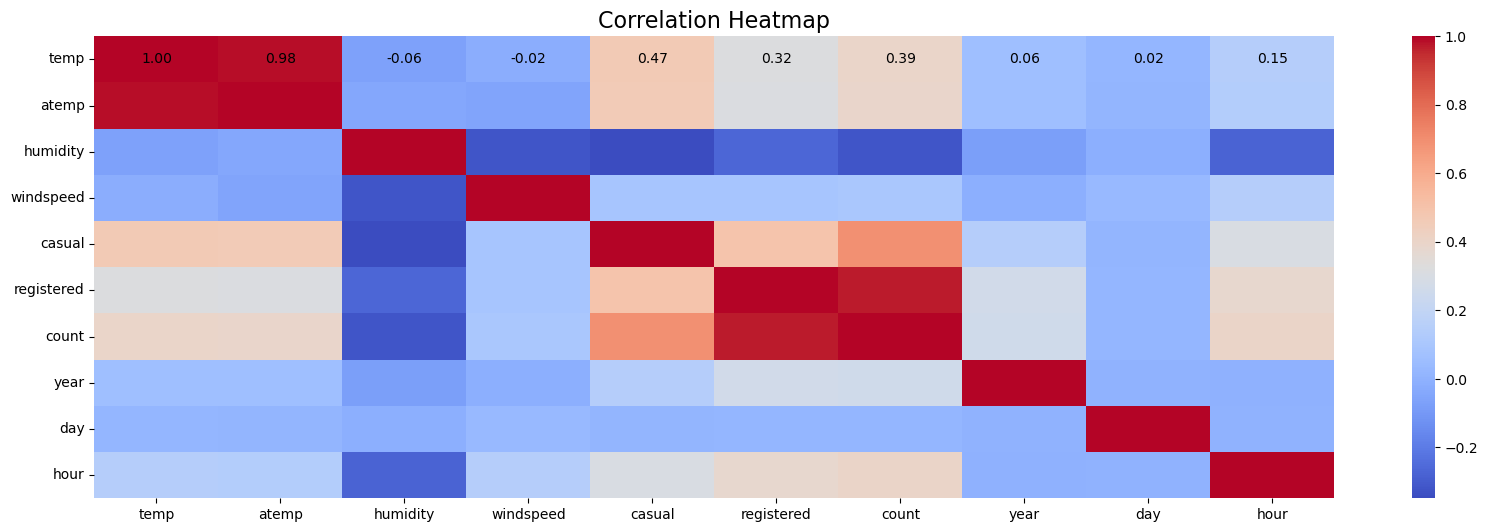

In [222]:
plt.figure(figsize=(20,6))
sns.heatmap(
    df[numeric_cols].corr(),
    annot=True,        # show numbers
    fmt=".2f",         # 2 decimal places
    cmap="coolwarm",   # color palette
    annot_kws={"size": 10, "color": "black"}  # <-- force text color
)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [227]:
monthly_count = df.groupby('month')['count'].sum().reset_index()
monthly_count = monthly_count.sort_values(by='count', ascending=False)
monthly_count

,month,count
6,jun,220733
5,jul,214617
1,aug,213516
11,sep,212529
10,oct,207434
8,may,200147
9,nov,176440
0,arp,167402
2,dec,160160
7,mar,133501


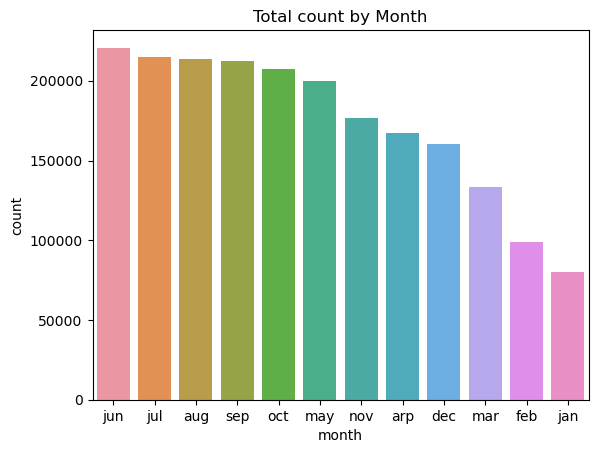

In [232]:
sns.barplot(data= monthly_count, x='month', y='count')
plt.title('Total count by Month')

plt.show()

# Hypothesis testing

## 1. Demand of Bicycles on rent is the same on Weekdays & Weekends

### shapiro for normality

In [237]:
t_stats, p_value = shapiro(df['count'])

In [238]:
p_value

0.0

### QQ plot for normality

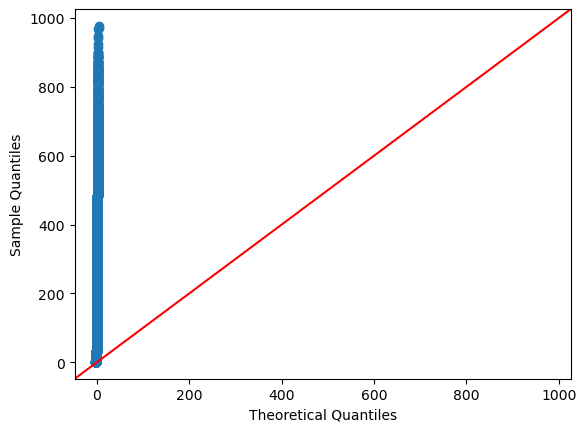

In [243]:
qqplot(df['count'], line= '45')

plt.show()

In [250]:
alpha = 0.05

### Levene's test

In [245]:
working = df[df['workingday'] == 'yes']['count']

holiday = df[df['workingday'] == 'no']['count']

In [248]:
levenes_test, p_value_levene = levene(working, holiday)

In [251]:
if p_value_levene < alpha:
    print('reject null hypothesis')
    print('conculsion >> The variances are not equal.')
else:
    print('fail to reject null hypothesis')
    print('conculsion >> The variances are equal.')

fail to reject null hypothesis
conculsion >> The variances are equal.


### T-Test

In [254]:
t_statistics, p_value_t = ttest_ind(working, holiday)

In [255]:
if p_value_t < alpha:
    print('reject null hypothesis')
    print('conculsion >> There is a significant difference of mean count between working and non-working days')
else:
    print('fail to reject null hypothesis')
    print('conculsion >> There is a no significant difference of mean count between working and non-working days')

fail to reject null hypothesis
conculsion >> There is a no significant difference of mean count between working and non-working days


## 2. Demand of Bicycles on rent For Different Weather Conditions

1. Since we have more than two categories now, so will use ANOVA here

Assumptions of ANOVA
1. The population data should be normally distributed. The data is not normal as verified by Wilkin-Shapiro test and the qqplot.

2. The data points must be independent- This condition is satisfied.
    
3. Approximately equal variance within groups- This will be verified using Levene's test.

### Levene Test check for variance

In [262]:
levene_statistics, p_value_levene = levene(weather_1, weather_2, weather_3, weather_4)

In [263]:
if p_value_levene < alpha:
    print('reject null hypothesis')
    print('conculsion >> The variances between atleast 2 groups is not equal.')
else:
    print('fail to reject null hypothesis')
    print('conculsion >> The variance bewteen all groups is equal.')

reject null hypothesis
conculsion >> The variances between atleast 2 groups is not equal.


### One Way ANOVA Test

In [267]:
anova_stats, p_value_anova = f_oneway(weather_1, weather_2, weather_3, weather_4)

In [268]:
if p_value_anova < alpha:
    print('reject null hypothesis')
    print('conculsion >> There is a significant difference in demand of bicycles atleast between 2 different Weather conditions')
else:
    print('fail to reject null hypothesis')
    print('conculsion >> There is no significant difference between demand of bicycles for different Weather conditions.')

reject null hypothesis
conculsion >> There is a significant difference in demand of bicycles atleast between 2 different Weather conditions


# 3. Demand of Bicycles on rent For Different Seasons

In [270]:
spring = df[df['season'] == 'spring']['count']

winter = df[df['season'] == 'winter']['count']

fall = df[df['season'] == 'fall']['count']

summer = df[df['season'] == 'summer']['count']

In [274]:
anova_statistcs_3, p_value_anova3 = f_oneway(spring, fall, winter, summer)

In [275]:
if p_value_anova3 < alpha:
    print('reject null hypothesis')
    print('conculsion >> There is a significant difference in demand of bicycles atleast between 2 different Seasons')
else:
    print('fail to reject null hypothesis')
    print('conculsion >> There is no significant difference in demand of bicycles atleast between 2 different Seasons')

reject null hypothesis
conculsion >> There is a significant difference in demand of bicycles atleast between 2 different Seasons
